In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('TH_beautyProd_Vanilla.csv')
df = df.astype(str)
df

Unnamed: 0 rate                                             review
0               0    4  แนะนำเลยค่ะ เคเอครีมตัวนี้เคยใช้เมื่อหลายปีแล้...
1               1    4  Review : BSC CRYSTAL AURA BODY LOTION SPF50 PA...
2               2    5  ครีมกันแดดก็คือสิ่งที่สำคัญที่จะมาเป็นตัวช่วยป...
3               3    5  ได้รับ BSC Crystal Aura Body Lotion SPF50 PA++...
4               4    5  รีวิวก่อนหน้าลืมโพสต์รูปคร่า?จากรูปจะเห็นว่าผิ...
...           ...  ...                                                ...
337179     337179    5  ใช้มาหลายกระปุกมากเลยค่ะ ติดใจและไม่คิดจะเปลี่...
337180     337180    3  เนื้อออยล์ไม่ข้นมาก นวดแล้วลื่นมือ แต่ยังล้างพ...
337181     337181    4  ล้างเครื่องสำอางออกได้ดีค่ะ อายไลเนอร์ มาสคาร่...
337182     337182    3  ปกปิดได้ในระดับนึง แต่ดีที่ดูไม่หนา ดูบางๆใสๆต...
337183     337183    5  ล้างเครื่องสำอางได้สะอาดหมดจดในครั้งเดียวใช้ติ...

[337184 rows x 3 columns]

<AxesSubplot:>

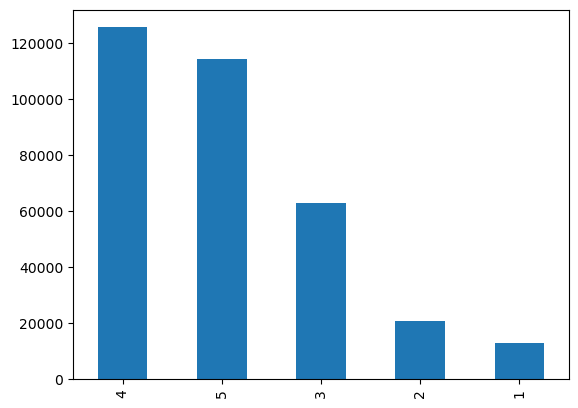

In [4]:
df['rate'].value_counts().plot.bar()

In [5]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['จัดการ',
 'เป็นต้น',
 'กู',
 'ฯล',
 'นานๆ',
 'เท่า',
 'ทั้งสิ้น',
 'ไว้',
 'กว้าง',
 'ช้านาน',
 'ส่วนใหญ่',
 'ประการฉะนี้',
 'จะได้',
 'ง่ายๆ',
 'สุดๆ',
 'อย่างไร',
 'เป็นต้นมา',
 'เช่นนั้นเอง',
 'ซึ่งก็',
 'นี่แน่ะ',
 'เพียงแต่',
 'ทั้งหลาย',
 'เช่นไร',
 'ครบครัน',
 'ด้วยเช่นกัน',
 'อย่างไรก็',
 'หนอย',
 'ข้างบน',
 'มี',
 'ให้แด่',
 'นะ',
 'พวกโน้น',
 'เห็น',
 'คราวหน้า',
 'ด้วยเหตุที่',
 'ย่อม',
 'คล้ายว่า',
 'ฝ่ายใด',
 'หนึ่ง',
 'แห่ง',
 'ทั้ง',
 'ฯ',
 'เนื่องจาก',
 'เป็นอันๆ',
 'นับแต่ที่',
 'ซะ',
 'พอควร',
 'มากกว่า',
 'ประกอบ',
 'ครั้งละ',
 'จ้า',
 'เพิ่งจะ',
 'พวกท่าน',
 'แต่ก่อน',
 'ความ',
 'รวมทั้ง',
 'ปรากฏ',
 'นู่น',
 'ถึงบัดนั้น',
 'แค่นั้น',
 'แรก',
 'ให้ดี',
 'ตามที่',
 'ทาง',
 'ด้วยเหตุนี้',
 'ดังกับว่า',
 'นั้น',
 'นอกจากนี้',
 'ครั้งคราว',
 'ขาด',
 'พวกกัน',
 'สิ่ง',
 'เพื่อที่',
 'มากมาย',
 'มิ',
 'กว้างๆ',
 'สู่',
 'ที่ๆ',
 'รับ',
 'ถูกต้อง',
 'ดั่งกับ',
 'ปิด',
 'คราหนึ่ง',
 'ถึง',
 'มักจะ',
 'ค่อนข้างจะ',
 'กำลัง',
 'บางครา',
 'ครั้งหนึ่ง',
 'กลับ',
 'จาก',
 'คงจ

In [6]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","-"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['review'].apply(text_process)
df


Unnamed: 0 rate                                             review  \
0               0    4  แนะนำเลยค่ะ เคเอครีมตัวนี้เคยใช้เมื่อหลายปีแล้...   
1               1    4  Review : BSC CRYSTAL AURA BODY LOTION SPF50 PA...   
2               2    5  ครีมกันแดดก็คือสิ่งที่สำคัญที่จะมาเป็นตัวช่วยป...   
3               3    5  ได้รับ BSC Crystal Aura Body Lotion SPF50 PA++...   
4               4    5  รีวิวก่อนหน้าลืมโพสต์รูปคร่า?จากรูปจะเห็นว่าผิ...   
...           ...  ...                                                ...   
337179     337179    5  ใช้มาหลายกระปุกมากเลยค่ะ ติดใจและไม่คิดจะเปลี่...   
337180     337180    3  เนื้อออยล์ไม่ข้นมาก นวดแล้วลื่นมือ แต่ยังล้างพ...   
337181     337181    4  ล้างเครื่องสำอางออกได้ดีค่ะ อายไลเนอร์ มาสคาร่...   
337182     337182    3  ปกปิดได้ในระดับนึง แต่ดีที่ดูไม่หนา ดูบางๆใสๆต...   
337183     337183    5  ล้างเครื่องสำอางได้สะอาดหมดจดในครั้งเดียวใช้ติ...   

                                              text_tokens  
0       แนะนำ เลย ค่ะ เค เอ ครีม ตัว นี้ เคย ใช้ เมื่อ...  
1       Review BSC CRYSTAL AURA BODY LOTION SPF 50 PA ...  
2       ครีมกันแดด ก็ คือ สิ่ง ที่ สำคัญ ที่จะ มา เป็น...  
3       ได้รับ BSC Crystal Aura Body Lotion SPF 50 PA ...  
4       รีวิว ก่อนหน้า ลืม โพสต์ รูป คร่า จาก รูป จะ เ...  
...                                                   ...  
337179  ใช้ มา หลาย กระปุก มาก เลย ค่ะ ติดใจ และ ไม่ ค...  
337180  เนื้อ ออยล์ ไม่ ข้น มาก นวด แล้ว ลื่น มือ แต่ ...  
337181  ล้าง เครื่องสำอาง ออก ได้ดี ค่ะ อาย ไลเนอร์ มา...  
337182  ปกปิด ได้ ใน ระดับ นึง แต่ ดี ที่ ดู ไม่ หนา ด...  
337183  ล้าง เครื่องสำอาง ได้ สะอาดหมดจด ใน ครั้ง เดีย...  

[337184 rows x 4 columns]

/var/folders/hj/vmbgf9dd4tq0dvgjdngp58kw0000gn/T/ipykernel_2680/2291654853.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pos = df_pos.append(df[df['rate'] == '4'])


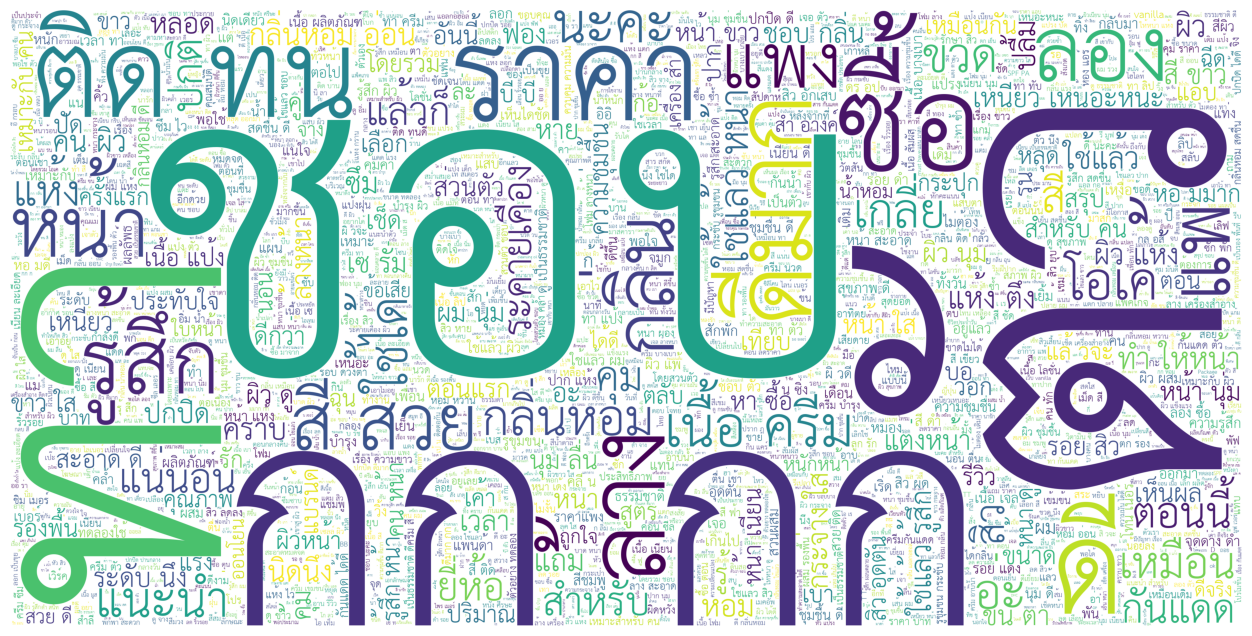

In [7]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['rate'] == '5']
df_pos = df_pos.append(df[df['rate'] == '4'])
#df_pos
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

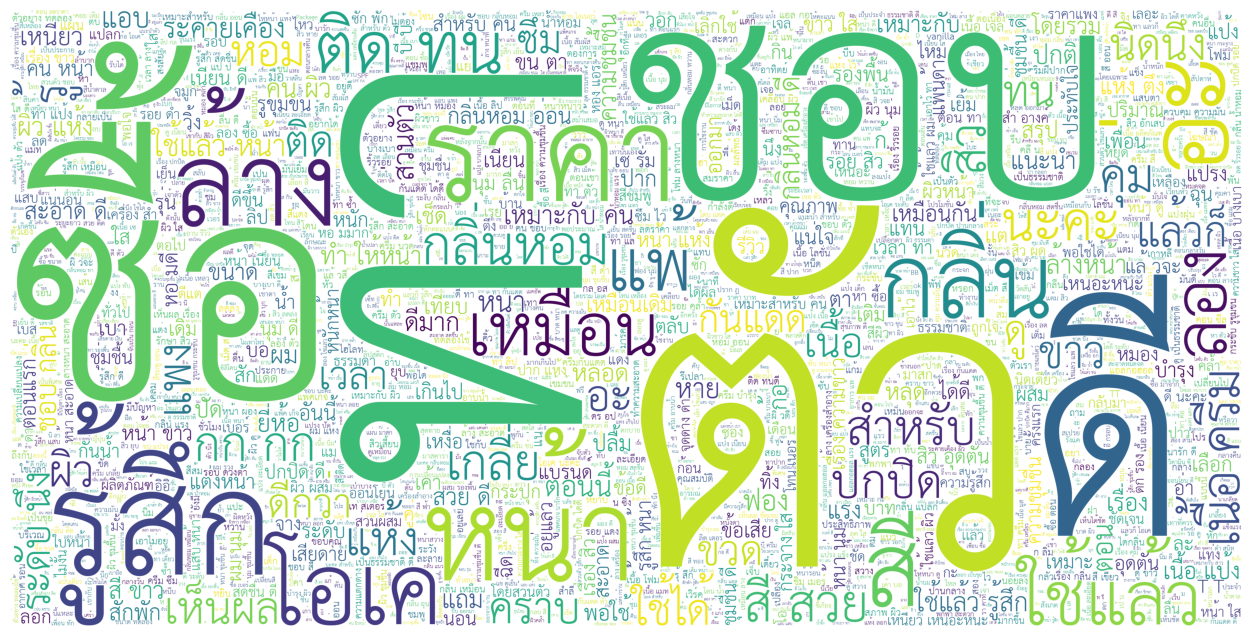

In [8]:
from wordcloud import WordCloud, STOPWORDS
df_neu = df[df['rate'] == '3']
#df_pos = df_pos.append(df[df['rate'] == '4'])
neu_word_all = " ".join(text for text in df_neu['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neu_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

/var/folders/hj/vmbgf9dd4tq0dvgjdngp58kw0000gn/T/ipykernel_2680/489978447.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_neg = df_neg.append(df[df['rate'] == '1'])


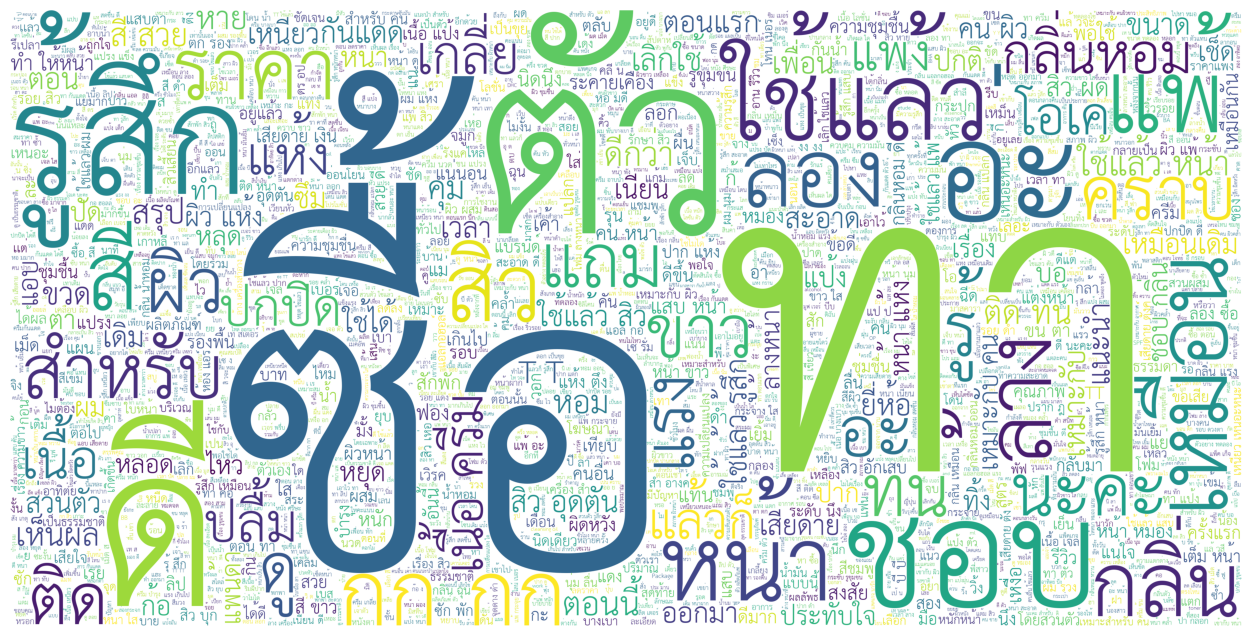

In [9]:
from wordcloud import WordCloud, STOPWORDS
df_neg = df[df['rate'] == '2']
df_neg = df_neg.append(df[df['rate'] == '1'])
#df_pos
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'ใช้แล้ว': 45113,
 'ผิว': 27518,
 'ใส': 45229,
 'หน้า': 34752,
 'เนียน': 39242,
 'แต': 43105,
 'ไม่': 45641,
 'ขาว': 18021,
 'ขึ้น': 18122,
 'เท่าไหร่': 39118,
 'ชอบ': 20787,
 'รูขุมขน': 31296,
 'ก็': 17503,
 'ละเอียด': 31889,
 'ด้วย': 22533,
 'ย': 29971,
 'ไว้': 45787,
 'ทา': 24132,
 'ช่วง': 21257,
 'ก่อน': 17524,
 'นอน': 24959,
 'กลางคืน': 16706,
 'ค่ะ': 19630,
 'หอ': 35292,
 'มดี': 28973,
 'ให้': 45292,
 'ความชุ่มชื้น': 18878,
 'เวลานอน': 41331,
 'ห้อง': 35579,
 'แอร์': 44162,
 'ผิวหน้า': 27530,
 'มักจะ': 29215,
 'แห้ง': 44111,
 'พอ': 28050,
 'เช้า': 38500,
 'ตื่น': 23342,
 'มา': 29379,
 'นิ่ม': 25219,
 'มาก': 29380,
 'กก': 16234,
 'แก้ม': 42843,
 'เหมือน': 41793,
 'เด็ก': 38757,
 'บบ': 25851,
 'เป็น': 39927,
 'ครีม': 18625,
 'บำรุง': 26229,
 'ที่': 24394,
 'แพ้': 43597,
 'ซื้อ': 21697,
 'ต่อ': 23414,
 'แน่นอน': 43337,
 'กลิ่นหอม': 16728,
 'ติด': 23198,
 'ทน': 23837,
 'พอควร': 28055,
 'ดับกลิ่น': 22180,
 'ได้ดี': 45461,
 'เหมือนกัน': 41794,
 'สิว': 34072,
 'และ': 43919,
 'รอย': 307

In [ ]:
#train_bow = cvec.transform(X_train['text_tokens'])
#pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])


In [ ]:
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(train_bow, y_train)

In [ ]:
#from sklearn.metrics import confusion_matrix,classification_report
#test_bow = cvec.transform(X_test['text_tokens'])
#test_predictions = lr.predict(test_bow)
#print(classification_report(test_predictions, y_test))


In [ ]:
#my_text = ''
#my_tokens = text_process(my_text)
#my_bow = cvec.transform(pd.Series([my_tokens]))
#my_predictions = lr.predict(my_bow)
#my_predictions